# Prerequisite
* Load required packages and load images (already uploaded on BlackBoard) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
* Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY following opencv functions for any type of opencv operations**

>[cv.imread](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56),

* **Use ONLY following basic numpy/tensorflow/pytorch operations**


In [17]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

##Q1) **Implement mean shift for filtering and segmentation of a color image.**
## Use **'fruits.png'** and **'parrot.png'** as two different inputs.
## In this case, the points are in $5D$ space $(x,y, R,G,B)$.
## Use a Gaussian kernel for mean shift procedure with spatial standard deviation $\sigma_{sp}$ and intensity standard deviation $\sigma_{int}$. Kindly tune and notify $\sigma_{sp} \in [9,12]$ and $\sigma_{int}\in [18,25]$ accordingly.
##  While performing the mean shift iterations on any point, compute the weighted average using only those points falling within a $23 × 23$ square centered at $(x_t , y_t)$ where $(x_t , y_t )$ are the spatial coordinates of the point in the current iteration (note that these spatial coordinates will change in every iteration).
**[Note: This implementation 5 values $(x,y,R,G,B)$ are updated per pixel. DO NOT USE more than one for loop. USE tf.Image.extract_patches() OR torch.nn.unfold() to vectorize over patches]**
## **Display the initial image, and the filtered image.**
##Given the filtered image, we will now perform segmentation on it using $K$-means in the joint spatial and intensity space, using $K = 100$.
## Use inbuilt K-means function in python [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
## **Display the segmented image** - assign all pixels in a segment a color value equal to the average of the color of all pixels in that segment.
##**[10 points]**

##(a)[**0 Points**] Show the Original Images

Data_type is {} int16
Image Size is (512, 512, 3)
Image min and max are (0, 255)


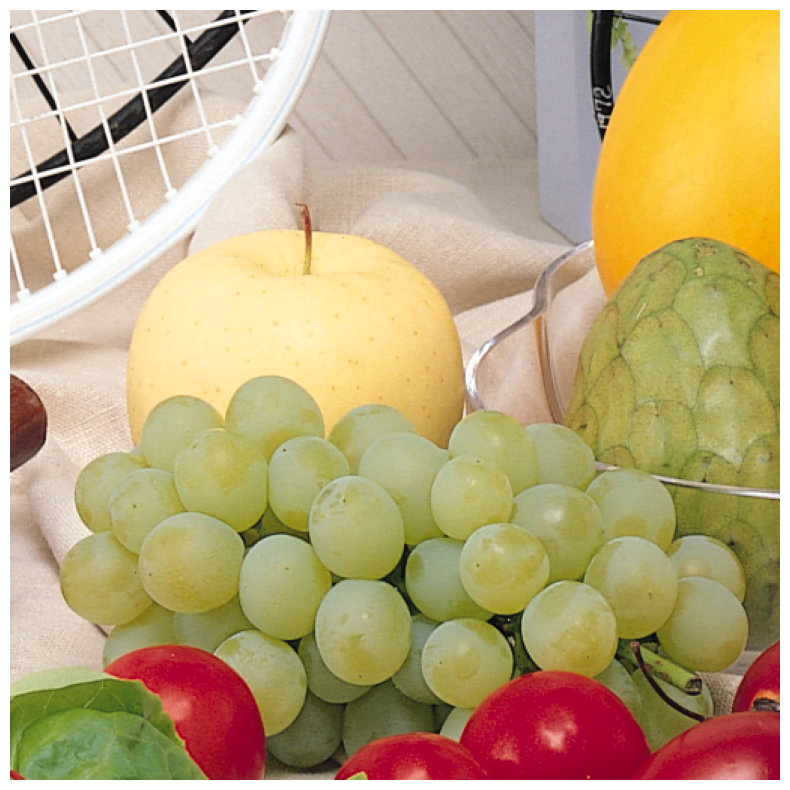

In [18]:
img1 =  cv.imread('fruits.png', cv.IMREAD_ANYCOLOR)
img1 = img1[:, :, ::-1]
kernel_sz1 = np.ones(1)
## Change Data type of image ####################
img1 = cv.filter2D(img1, cv.CV_16S, kernel_sz1)
#################################################

print('Data_type is {}', img1.dtype)
print('Image Size is {}'.format(img1.shape))
print('Image min and max are ({}, {})'.format(img1.min(),img1.max()))
plt.figure(figsize=(10,10))
plt.imshow(img1)
plt.axis('off')
plt.show()

Data_type is {} int16
Image Size is (221, 350, 3)
Image min and max are (0, 255)


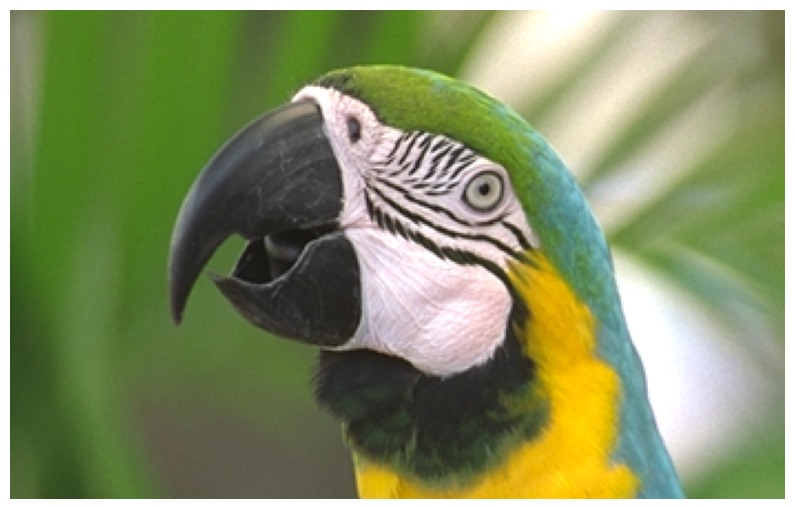

In [19]:
img2 =  cv.imread('parrot.png', cv.IMREAD_ANYCOLOR)
img2 = img2[:, :, ::-1]
kernel_sz1 = np.ones(1)
## Change Data type of image ####################
img2 = cv.filter2D(img2, cv.CV_16S, kernel_sz1)
#################################################

print('Data_type is {}', img2.dtype)
print('Image Size is {}'.format(img2.shape))
print('Image min and max are ({}, {})'.format(img2.min(),img2.max()))
plt.figure(figsize=(10,10))
plt.imshow(img2)
plt.axis('off')
plt.show()

##(a)[**0 Points**] Show the Output Images of K-means function without MeanShift, aka **Segmented Image**

In [20]:
from sklearn.cluster import KMeans
import scipy.interpolate as inter
def kmean_cluster(I, K, step_size=1):
  (m0,n0,dim) = I.shape
  data_val = I[0:m0:step_size,0:n0:step_size,:]
  [jj1, ii1] = np.meshgrid(range(0,n0,step_size),range(0,m0,step_size))
  coordX = ii1
  coordY = jj1

  (m,n,_) = data_val.shape
  data_vec = np.reshape(data_val,(m*n,dim))
  x_vec = np.ravel(coordX).reshape((-1,1))
  y_vec = np.ravel(coordY).reshape((-1,1))

  big_data = np.hstack((x_vec,y_vec,data_vec))
  kmeans = KMeans(n_clusters=K, random_state=43).fit(big_data)
  labels = kmeans.labels_
  cmeans = kmeans.cluster_centers_

  c_vec = np.zeros((m*n,dim))
  for idx in range(m*n):
    c_vec[idx,:] = cmeans[labels[idx],2:]

  c_img = np.reshape(c_vec,(m,n,dim))
  xym = np.hstack( (x_vec, y_vec) )
  data0 = c_vec[:,0]
  data1 = c_vec[:,1]
  data2 = c_vec[:,2]
  interp0 = inter.NearestNDInterpolator( xym, data0 )
  interp1 = inter.NearestNDInterpolator( xym, data1 )
  interp2 = inter.NearestNDInterpolator( xym, data2 )

  [yy, xx] = np.meshgrid(np.arange(n0), np.arange(m0))

  result0 = interp0(np.ravel(xx), np.ravel(yy)).reshape( xx.shape )
  result1 = interp1(np.ravel(xx), np.ravel(yy)).reshape( xx.shape )
  result2 = interp2(np.ravel(xx), np.ravel(yy)).reshape( xx.shape )

  # combine them into an output image
  img_out = np.dstack( (result0, result1, result2) )
  return img_out,c_img,kmeans

In [21]:
[img_c1,c_img1,kmean1] = kmean_cluster(img1, 100, step_size=1)
[img_c2,c_img2,kmean2] = kmean_cluster(img2, 100, step_size=1)

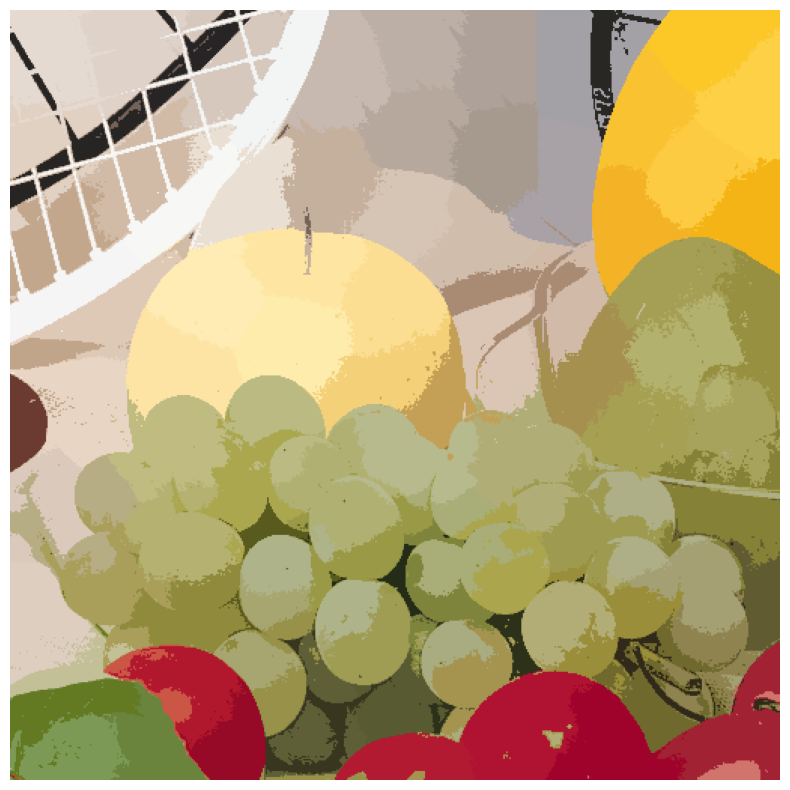

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(img_c1.astype(np.int16), cmap='gray')
plt.axis('off')
plt.show()

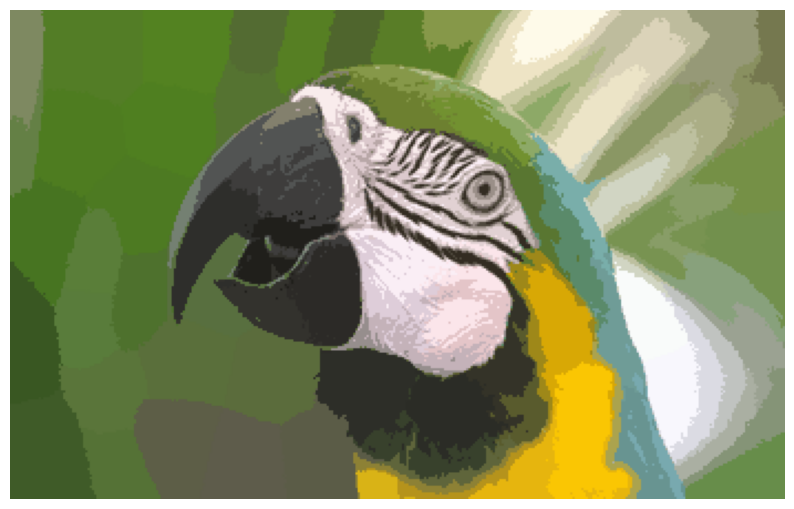

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(img_c2.astype(np.int16), cmap='gray')
plt.axis('off')
plt.show()

##(b)[**10 Points**] Show the Output Images of Mean-Shift Algorithm, aka. **Filetered Image**

In [24]:
spatialRadius= 10
colorRadius=60

(-0.5, 349.5, 220.5, -0.5)

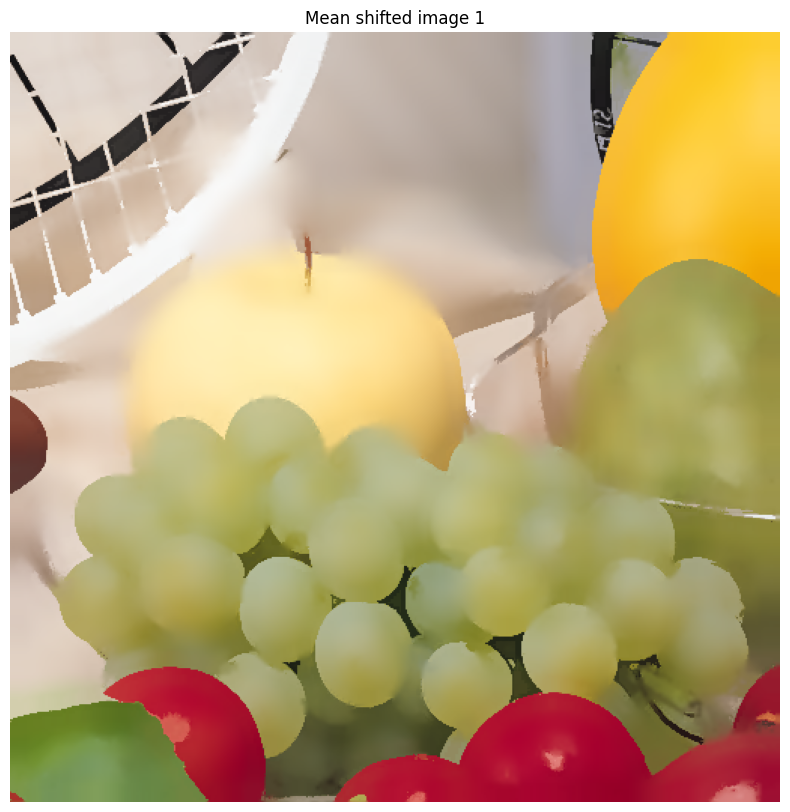

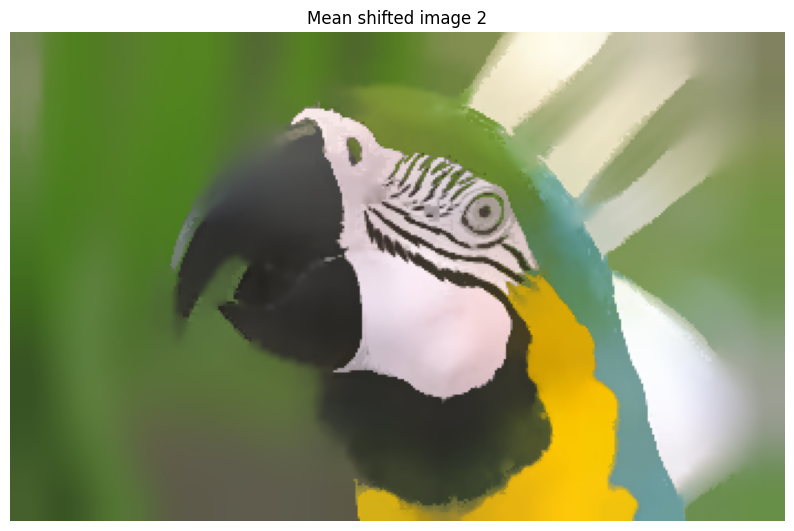

In [25]:
img1_8bit=cv.convertScaleAbs(img1)
img2_8bit=cv.convertScaleAbs(img2)

img1_mean_shift=cv.pyrMeanShiftFiltering(img1_8bit, spatialRadius, colorRadius)
img2_mean_shift=cv.pyrMeanShiftFiltering(img2_8bit, spatialRadius, colorRadius)

plt.figure(figsize=(10,10))
plt.title("Mean shifted image 1")
plt.imshow(img1_mean_shift)
plt.axis('off')

plt.figure(figsize=(10,10))
plt.title("Mean shifted image 2")
plt.imshow(img2_mean_shift)
plt.axis('off')


##(c)[**0 Points**] Show the Output Images of K-Means after MeanShift, aka. **Filetered Image**

(-0.5, 349.5, 220.5, -0.5)

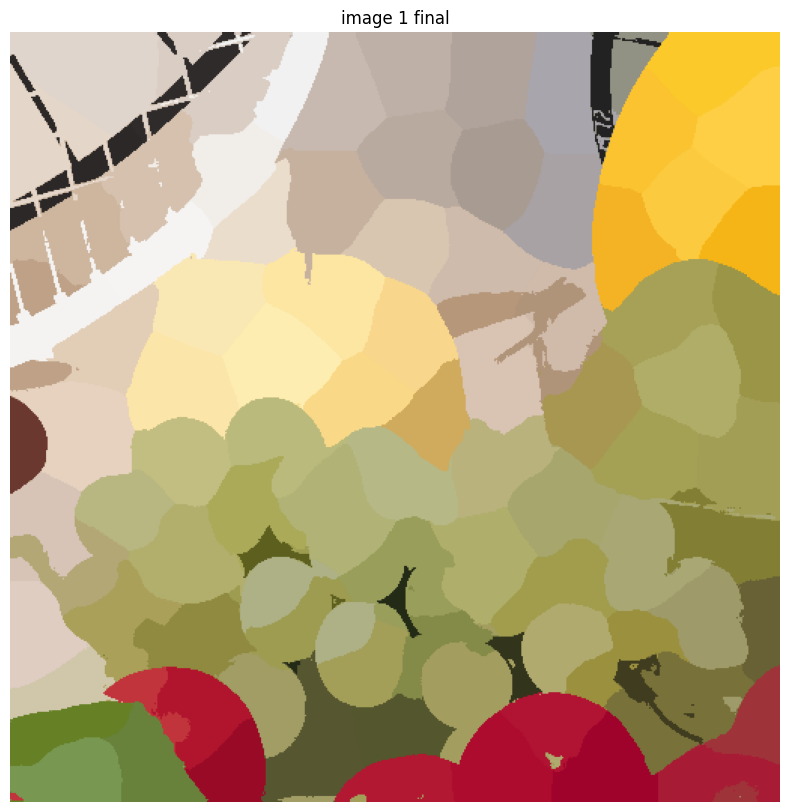

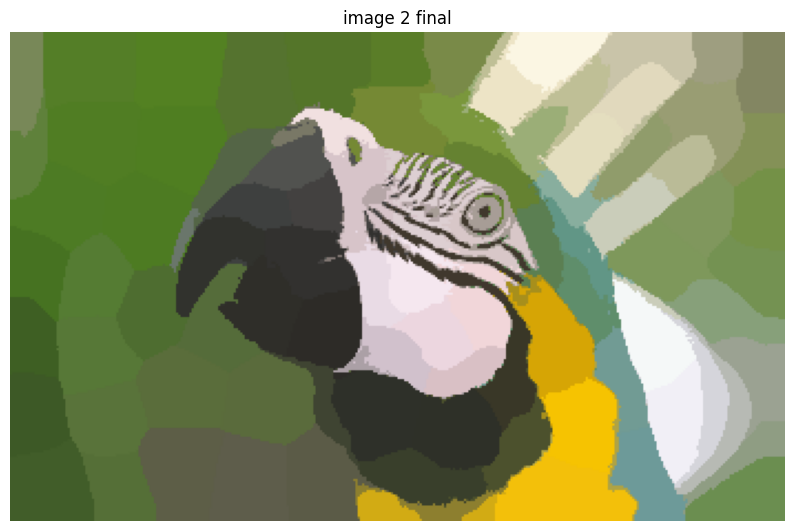

In [26]:
[img1_c1ms,_,_]=kmean_cluster(img1_mean_shift, 100)
[img2_c2ms,_,_]=kmean_cluster(img2_mean_shift, 100)

plt.figure(figsize=(10,10))
plt.title("image 1 final")
plt.imshow(img1_c1ms.astype(np.int16), cmap='gray')
plt.axis('off')

plt.figure(figsize=(10,10))
plt.title("image 2 final")
plt.imshow(img2_c2ms.astype(np.int16), cmap='gray')
plt.axis('off')